# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os


# Get current directory path
dirPath = os.path.dirname(os.getcwd())

# File paths for training, valiation and testing data sets
training_file = os.path.join(dirPath, "traffic-signs-data/train.p")
validation_file = os.path.join(dirPath, "traffic-signs-data/valid.p")
testing_file = os.path.join(dirPath, "traffic-signs-data/test.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

output_dir = "output-images"

def show_traffic_sign(X, y, image_name, old_X = None):

    # Plotting a random traffic sign image
    index = random.randint(0, len(X))
    image = X[index].squeeze()

    if old_X is None:
        plt.imshow(image)
        plt.title("Label = {0}".format(y[index]))
    
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
        f.tight_layout(pad=1.0)
        f.suptitle("Label = {0}".format(y[index]), fontsize=30)
        
        old_image = old_X[index%n_train].squeeze()
        ax1.imshow(old_image)
        
        ax2.imshow(image)
        plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0, wspace = 0.1)
    
    plt.savefig(os.path.join(output_dir, image_name))
    plt.show() 
    plt.close()
 

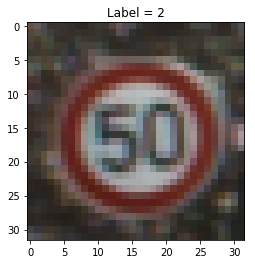

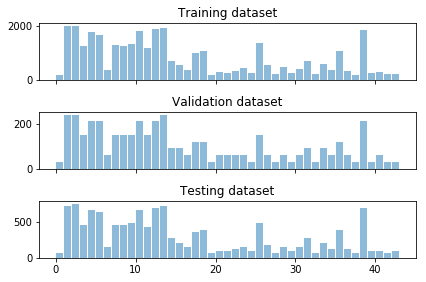

In [4]:
# Plotting a traffic sign example
show_traffic_sign(X_train, y_train, 'Example_traffic_sign')

# Plotting histograms of datasets
fig, axs = plt.subplots(3, sharex=True, sharey=False)
bins = np.arange(0, 44, 1)

axs[0].hist(y_train, bins=bins, alpha=0.5, rwidth=0.85)
axs[0].set_title("Training dataset")
axs[1].hist(y_valid, bins=bins, alpha=0.5, rwidth=0.85)
axs[1].set_title("Validation dataset")
axs[2].hist(y_test, bins=bins, alpha=0.5, rwidth=0.85)
axs[2].set_title("Testing dataset")

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

fig.tight_layout(pad=1.0)
        
plt.savefig(os.path.join(output_dir, 'Histograms'))
plt.show() 
plt.close()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Pre-processing

To increase the training set, I generate fake data  by adding 5 transformed versions of the original training set, yielding 173 995 samples in total. Samples are randomly perturbed in position ([-2,2] pixels), in scale ([.9,1.1] ratio) and rotation ([-15,+15] degrees).
build a jittered dataset.  

In [5]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2
is_features_normal = False
has_fake_data = False

def translate_image(image):
    '''Randomly perturb an image in position ([-2,2] pixels)'''
    
    num_rows, num_cols = image.shape[:2]
    
    # Creating a translation matrix
    transform = random.randint(0, 3)
    if transform == 0:
        translation_matrix = np.float32([ [1,0,2], [0,1,2] ])
    if transform == 1:
        translation_matrix = np.float32([ [1,0,-2], [0,1,2] ])
    if transform == 2:
        translation_matrix = np.float32([ [1,0,-2], [0,1,-2] ])
    if transform == 3:
        translation_matrix = np.float32([ [1,0,2], [0,1,-2] ])
        
    result = cv2.warpAffine(image, translation_matrix, (num_cols,num_rows))

    return result

def rotate_image(image):
    '''Randomly perturb an image in rotation ([-15,+15] degrees)'''
    
    angle = -15 + 30*random.randint(0, 1)
    
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    return result

def resize_image(image):
    '''Randomly perturb an image in scale ([.9,1.1] ratio)'''
    
    num_rows, num_cols = image.shape[:2]
    
    size = 28 + 8*random.randint(0, 1)
    result = cv2.resize(image, (size,size), interpolation=cv2.INTER_AREA)
    
    if size == 36:
        result = result[2:34,2:34,:]
    if size == 28:
        result = np.pad(result, [(2,2), (2,2), (0,0)], 'constant', constant_values=int(np.mean(result)))
    
    return result

def transform_image(image_data):
    '''
    Transform the image data set randomly perturbed in position ([-2,2] pixels), 
    in scale ([.9,1.1] ratio) and rotation ([-15,+15] degrees).
    '''
    fake_image_data = np.zeros(image_data.shape, dtype='uint8')
    
    for i in range(image_data.shape[0]):
        # Image translation    
        fake_image = translate_image(image_data[i])

        # Image Resize    
        fake_image = resize_image(fake_image)

        # Image Rotation    
        fake_image_data[i] = rotate_image(fake_image)

    return fake_image_data

In [6]:
# Implementation of Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
      
    a = 0.1
    b = 0.9   
    norm_gray_image = np.zeros(image_data.shape[:-1])
    
    for i in range(image_data.shape[0]): 
        yuv=cv2.cvtColor(image_data[i],cv2.COLOR_BGR2YUV)
        y_channel = yuv[:,:,0]
        
        min_data = np.min(y_channel)
        max_data = np.max(y_channel)
        norm_gray_image[i] = a + ((y_channel - min_data)*(b-a))/(max_data - min_data)
    
    norm_gray_image = np.reshape(norm_gray_image, image_data.shape[:-1] + (1,))
    return norm_gray_image

# Normalize the image data with formula (pixel - 128)/ 128
def normalize_image(image_data):
    """
    Normalize the image data with formula (pixel - 128)/ 128.
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    new_image_data = np.subtract(image_data.astype(int),128)/128
    return new_image_data


Generate fake data  1
Generate fake data  2
Generate fake data  3
Generate fake data  4


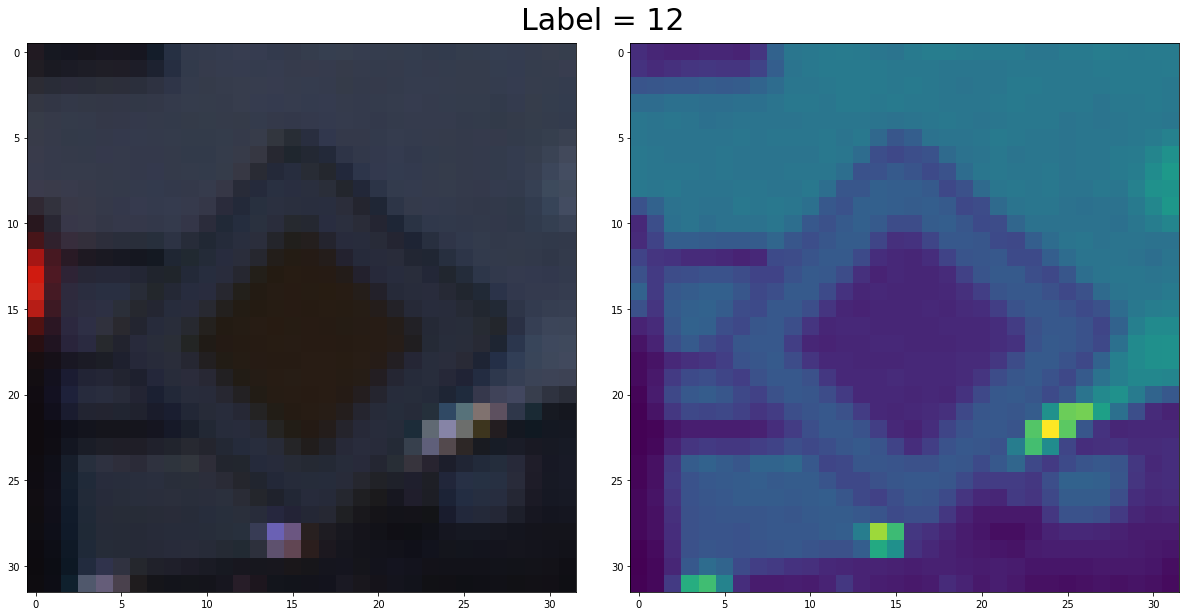

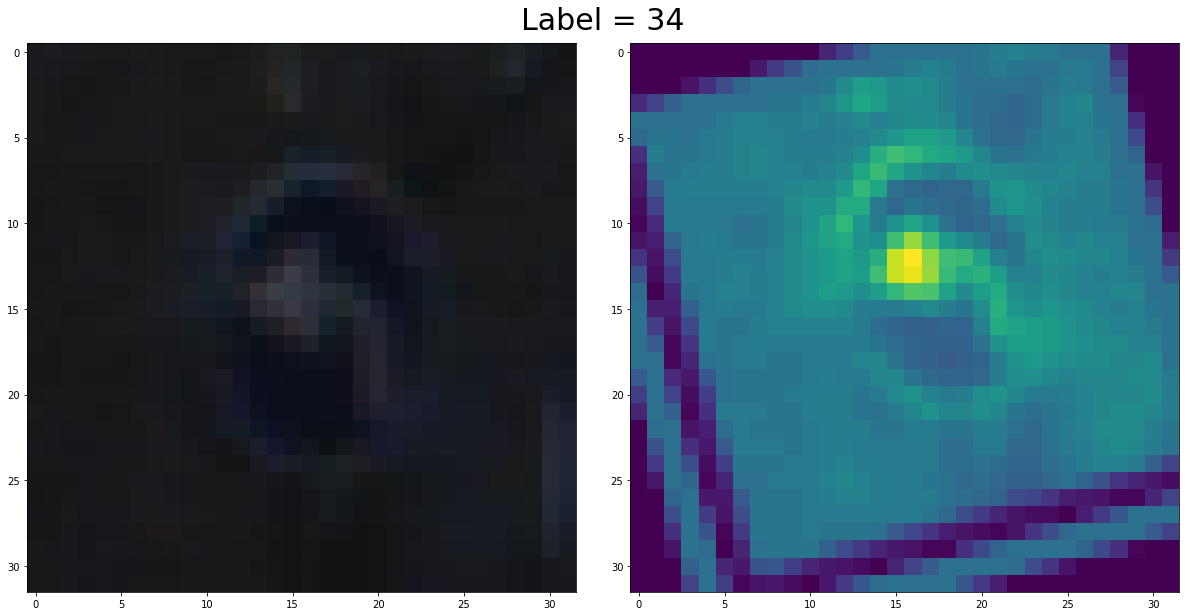

min value = 0.1 mean value =  0.40539409415290917 max value =  0.9000000000000001


In [7]:
# Generate fake data
n = 5
debug = True
if not has_fake_data:
    new_X_train_gray_norm = np.zeros((n*n_train,) + X_train.shape[1:-1] + (1,))

    new_X_train_gray_norm[0:n_train] = normalize_grayscale(X_train)
    new_y_train = y_train

    for i in range(n-1):
        print("Generate fake data ", i+1)
        new_X_train_gray_norm[(i+1)*n_train:(i+2)*n_train] = normalize_grayscale(transform_image(X_train))
        new_y_train = np.hstack((new_y_train,y_train))
    has_fake_data = True

if debug:
    show_traffic_sign(new_X_train_gray_norm[0:n_train], new_y_train[0:n_train], 'Preprocessed-image.png', X_train)
    show_traffic_sign(new_X_train_gray_norm[n_train:], new_y_train[n_train:], 'Augmented-image.png', X_train)
    print("min value =" , np.min(new_X_train_gray_norm), "mean value = ", np.mean(new_X_train_gray_norm),
          "max value = ", np.max(new_X_train_gray_norm))


In [8]:
if not is_features_normal:
    #X_train_norm = normalize_image(X_train)
    #X_valid_norm = normalize_image(X_valid)
    #X_test_norm = normalize_image(X_test)
    
    X_train_gray_norm = normalize_grayscale(X_train)
    X_valid_gray_norm = normalize_grayscale(X_valid)
    X_test_gray_norm = normalize_grayscale(X_test)
    is_features_normal = True

x_train = new_X_train_gray_norm
#x_train = X_train_gray_norm
y_train = new_y_train
x_valid = X_valid_gray_norm
x_test  = X_test_gray_norm
n_color_channel = x_train.shape[-1]

print("Input deep =", n_color_channel)

Input deep = 1


### Model Architecture
**Layer 1: Convolutional.** The input shape is 32x32xn_color_channel. The convolutional filter size is 5x5x32. The output shape will be 28x28x32.

**Activation.** 'relu' activation function.

**Dropout.** 

**Pooling.** Max pooling with stride 2x2. The output shape will be 14x14x32.

**Layer 2: Convolutional.** The input shape is 14x14x32. The convolutional filter size is 5x5x64. The output shape will be 10x10x64.

**Activation.** 'relu' activation function.

**Dropout.** 

**Pooling.** Max pooling with stride 2x2. The output shape will be 5x5x64.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D. The easiest way to do is by using `tf.contrib.layers.flatten`..

**Layer 3: Fully Connected.** Fully Connected layer with input = 1600 and Output = 512.

**Activation.** 'relu' activation function.

**Dropout.** 

**Layer 4: Fully Connected.** Fully Connected layer with input = 512 and Output = 256.

**Activation.** 'relu' activation function.

**Dropout.** 

**Layer 5: Fully Connected (Logits).** Fully Connected layer with input = 256 and Output = n_classes.

### Output
The ouput is the result ot the layer 5

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

EPOCHS = 15
BATCH_SIZE = 128


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    global conv1
    
    # Layer 1: Convolutional. Input = 32x32xn_color_channel. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape = (5, 5, n_color_channel, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    layer_1 = tf.nn.conv2d(x, conv1_W, strides, padding) + conv1_b
    
    conv1 = layer_1

    # Activation.
    layer_1 = tf.nn.relu(layer_1)
    
    # Dropout.
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    
    # Pooling. Input = 28x28x32. Output = 14x14x32.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    layer_1 = tf.nn.max_pool(layer_1, ksize, strides, padding)

    # Layer 2: Convolutional. Input = 14x14x32. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape = (5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    layer_2 = tf.nn.conv2d(layer_1, conv2_W, strides, padding) + conv2_b
    
    # Activation.
    layer_2 = tf.nn.relu(layer_2)
    
    # Dropout.
    layer_2 = tf.nn.dropout(layer_2, keep_prob)

    # Pooling. Input = 10x10x64. Output = 5x5x64.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'SAME'
    layer_2 = tf.nn.max_pool(layer_2, ksize, strides, padding)

    # Flatten. Input = 5x5x64. Output = 1600
    layer_2 = flatten(layer_2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape = (1600, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros([512]))
    layer_3 = tf.add(tf.matmul(layer_2, fc1_W), fc1_b)
    
    # Activation.
    layer_3 = tf.nn.relu(layer_3)
    
    # Dropout.
    layer_3 = tf.nn.dropout(layer_3, keep_prob)

    # Layer 4: Fully Connected. Input = 512. Output = 256.
    fc2_W = tf.Variable(tf.truncated_normal(shape = (512, 256), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros([256]))
    layer_4 = tf.add(tf.matmul(layer_3, fc2_W), fc2_b)
    
    # Activation.
    layer_4 = tf.nn.relu(layer_4)
    
    # Dropout.
    layer_4 = tf.nn.dropout(layer_4, keep_prob)

    # Layer 5: Fully Connected. Input = 256. Output = n_classes.
    fc3_W = tf.Variable(tf.truncated_normal(shape = (256, n_classes), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros([n_classes]))
    logits = tf.add(tf.matmul(layer_4, fc3_W), fc3_b)
    
    return logits

## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, n_color_channel))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

## Training Pipeline
Create a training pipeline that uses the model to classify the traffic sign data.

In [11]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Model Incorrect Labels
Return the incorrect labels to analyze which classes have more incorrect predictions

In [13]:
incorrect_mask = tf.not_equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
saver = tf.train.Saver()

def incorrect_predictions(X_data, y_data):
    num_examples = len(X_data)
    incorrect_labels = np.zeros(len(y_data))
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        mask = sess.run(incorrect_mask, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        incorrect_labels[offset:offset+BATCH_SIZE] = mask.astype('int')
    return incorrect_labels

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...\n")
 
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
           
        print("EPOCH {} ...".format(i+1))
        training_accuracy = evaluate(x_train, y_train) 
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        validation_accuracy = evaluate(x_valid, y_valid)
        print("Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")


Training...

EPOCH 1 ...
Training Accuracy = 0.779
Validation Accuracy = 0.849

EPOCH 2 ...
Training Accuracy = 0.896
Validation Accuracy = 0.915

EPOCH 3 ...
Training Accuracy = 0.932
Validation Accuracy = 0.943

EPOCH 4 ...
Training Accuracy = 0.956
Validation Accuracy = 0.948

EPOCH 5 ...
Training Accuracy = 0.969
Validation Accuracy = 0.963

EPOCH 6 ...
Training Accuracy = 0.978
Validation Accuracy = 0.966

EPOCH 7 ...
Training Accuracy = 0.978
Validation Accuracy = 0.977

EPOCH 8 ...
Training Accuracy = 0.983
Validation Accuracy = 0.976

EPOCH 9 ...
Training Accuracy = 0.979
Validation Accuracy = 0.972

EPOCH 10 ...
Training Accuracy = 0.988
Validation Accuracy = 0.983

EPOCH 11 ...
Training Accuracy = 0.986
Validation Accuracy = 0.984

EPOCH 12 ...
Training Accuracy = 0.989
Validation Accuracy = 0.976

EPOCH 13 ...
Training Accuracy = 0.990
Validation Accuracy = 0.985

EPOCH 14 ...
Training Accuracy = 0.987
Validation Accuracy = 0.980

EPOCH 15 ...
Training Accuracy = 0.991
Valid

# Analyse the misclassified labels of the validation set
Get the misclassified labels of the validation set to verify what are the classes with most incorrect predictions

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./lenet
Number of incorrect traffic signs = 70

The most misclassified classes are: [(0, 23.33), (21, 21.67), (27, 13.33), (20, 11.67), (30, 6.67), (41, 6.67), (34, 5.0), (7, 4.0), (25, 4.0), (3, 3.33), (24, 3.33), (26, 3.33), (33, 2.22), (23, 1.67), (31, 1.11), (5, 0.95), (1, 0.83), (8, 0.67), (13, 0.42)]


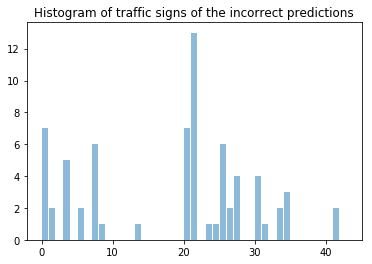

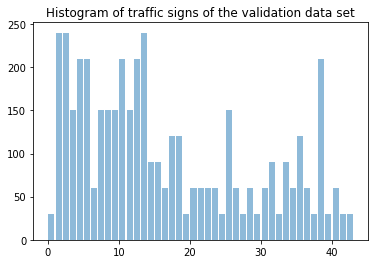

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    incorrect_labels = incorrect_predictions(x_valid, y_valid)
        
debug = True
if debug:
    
    incorrect_traffic_signs = [i for idx, i in enumerate(y_valid) if incorrect_labels[idx]]
    print("Number of incorrect traffic signs =", len(incorrect_traffic_signs))

    unique, counts = np.unique(y_valid, return_counts=True)
    y_dict = dict(zip(unique, counts))

    unique, counts = np.unique(incorrect_traffic_signs, return_counts=True)
    incorr_dict = dict(zip(unique, counts))

    loss_dict = {}
    for key in incorr_dict:
        loss_dict[key] = np.round(100*incorr_dict[key]/y_dict[key],2)

    loss_dict = sorted(loss_dict.items(), key=lambda x: x[1],reverse=True)
    print("\nThe most misclassified classes are:", loss_dict)

    # Plotting
    bins = np.arange(0, 44, 1)
    plt.title('Histogram of traffic signs of the incorrect predictions')

    plt.hist(incorrect_traffic_signs, bins=bins, alpha=0.5, rwidth=0.85)
    plt.show()

    plt.title('Histogram of traffic signs of the validation data set')
    plt.hist(y_valid, bins=bins, alpha=0.5, rwidth=0.85)
    plt.show()

## Evaluate the Model
Once I am completely satisfied with my model, I evaluate the performance of the model on the test set.

In [16]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.960


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Image 1 shape = (640, 640, 4)
Image 2 shape = (640, 640, 4)
Image 3 shape = (640, 640, 4)
Image 4 shape = (564, 640, 4)
Image 5 shape = (640, 640, 4)


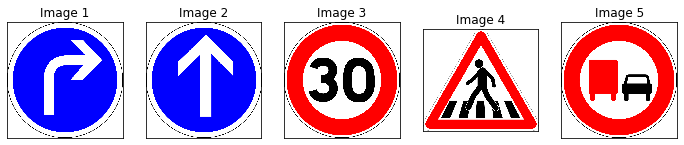

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from glob import glob
import matplotlib.image as mpimg

## Load the traffic sign images downloaded from the web
image_paths = glob('traffic-sign-images/*')

n_images = len(image_paths)
i = 0
fig, axs = plt.subplots(1,n_images, figsize=(12, 12))

# View the images
for image_path in image_paths:
    example = mpimg.imread(image_path)
    axs[i].imshow(example)
    axs[i].set_title("Image {0}".format(i+1))
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)
    i += 1
    
    print("Image {0} shape =".format(i), example.shape)
    
plt.savefig(os.path.join(output_dir, "Traffic-Signs"))
plt.show() 
plt.close()

# Looking into the file 'signnames.csv' we manually define the correct label for each image
label = [0]*n_images
label[0] = 33 # turn right only
label[1] = 35 # ahead only
label[2] = 1  # speed limit 30km/h
label[3] = 27 # pedestrians
label[4] = 10 # no passing for vehicles over 3.5 metric tons


### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Pre-processing the images by downsampling to 32x32x3 size, Convert to YUV color space, use the Y channel and normalize it
norm_gray_images = np.zeros((n_images,32,32))

i = 0
a = 0.1
b = 0.9  

# View an example of an image
for image_path in image_paths:
    example = mpimg.imread(image_path)
    
    rgb = cv2.cvtColor(example, cv2.COLOR_RGBA2RGB)
    rgb = cv2.resize(rgb, (32,32), interpolation=cv2.INTER_AREA)
    
    yuv = cv2.cvtColor(rgb,cv2.COLOR_RGB2YUV)
    y_channel = yuv[:,:,0]

    min_data = np.min(y_channel)
    max_data = np.max(y_channel)
    norm_gray_images[i] = a + ((y_channel - min_data)*(b-a))/(max_data - min_data)
    
    #plt.imshow(norm_gray_images[i])
    #plt.show()
    i += 1

norm_gray_images = np.reshape(norm_gray_images, (n_images,32,32,1))

# Predict the output using the model
predictions = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    result = sess.run(predictions, feed_dict={x: norm_gray_images, keep_prob: 1})
    print("Result = ", result)    


INFO:tensorflow:Restoring parameters from ./lenet
Result =  [33 35  1 26 10]


### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

accuracy = sum(result == label)/n_images
print("Accuracy = {:.3f}".format(accuracy))

Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

top_k = tf.nn.top_k(tf.nn.softmax(logits), k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    top_labels = sess.run(top_k, feed_dict={x: norm_gray_images, keep_prob: 1})
    
print(top_labels)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[9.9995887e-01, 1.8562956e-05, 1.0908136e-05, 6.9804678e-06,
        2.0393943e-06],
       [9.9908233e-01, 3.1859629e-04, 2.9877276e-04, 2.2556144e-04,
        3.6091584e-05],
       [9.9683940e-01, 2.5615995e-03, 4.2391635e-04, 1.0483614e-04,
        4.3744483e-05],
       [3.1810421e-01, 2.1354017e-01, 1.8193863e-01, 1.5694372e-01,
        7.8365684e-02],
       [9.5669138e-01, 4.1518908e-02, 9.5924112e-04, 4.3339943e-04,
        1.4776389e-04]], dtype=float32), indices=array([[33, 42, 35,  3,  6],
       [35, 33,  3, 37, 36],
       [ 1,  0,  6,  2,  3],
       [26, 27, 18, 24, 25],
       [10, 42,  9,  5, 16]], dtype=int32))


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


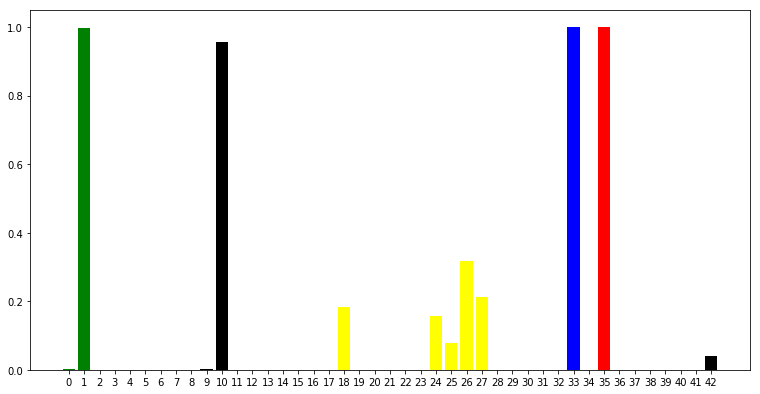

In [21]:

colors = ['blue', 'red', 'green', 'yellow', 'black']

# Plotting the top five softmax probabilities as a bar charts
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])

for i in range(5):
    ax.bar(top_labels.indices[i], top_labels.values[i], color=colors[i])

ax.set_xticks(np.arange(43))
fig.tight_layout()
        
                       
plt.savefig(os.path.join(output_dir, 'BarChart-Softmax'),bbox_inches='tight')
plt.show() 
plt.close()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob: 1})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./lenet


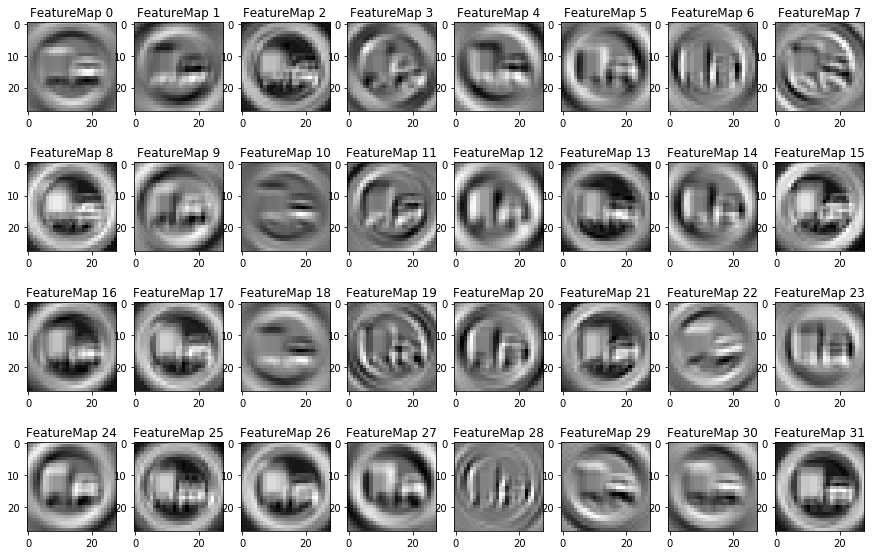

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
        
    image_input = norm_gray_images[4].reshape(1, 32,32,1)
    tf_activation = conv1
    outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1)
    
    plt.savefig(os.path.join(output_dir, "FeatureMap"))
    plt.show()
    plt.close()